# 料理の大成功期待値を算出

このノートブックでは、料理チャンススキルによる大成功確率の上昇を考慮し、
1 週間（21 回）の料理における **大成功回数の期待値** を動的計画法（DP）で算出します。

## 簡易説明

- 毎食ごとに料理チャンススキルで、同じだけ大成功確率を上昇させる前提で、1週間の大成功回数の期待値を算出しています。
  - 例：毎食+10%させる場合
    - 1回目：大成功確率：20%（通常の+10%含む）
    - 2回目：前回成功した場合：20%、前回失敗した場合：30%（さらに+10%）
    - 3回目：前回の結果に応じて、20%、30%、40%のいずれか

## 処理概要

- 毎食ごとに料理チャンススキルが発動し、大成功確率を **+X%** 上昇させる（X は引数）
  - 例：X = 40%（料理チャンススキル MAX を 4 回発動した状態）

- 前回の料理結果によって、次回の大成功ベース確率が変化する
  - **前回成功した場合**：リセットされ、次回のベース確率は **X%**
  - **前回失敗した場合**：ベース確率に **X% が加算**される（ただし **上限 70%**）
    - 失敗が続くほどボーナスが蓄積し、最大 70% まで上昇する

- これに加えて、曜日によるボーナスが加算される  
  - **日曜日以外：+10%**  
  - **日曜日：+30%**

- 上記を合算した大成功確率を用いて、  
  **1 週間（21 回）の大成功回数の期待値** を計算する

- 各料理回数ごとの期待値も出力する

## 大成功期待値算出コード

In [1]:
def cook_success(prob):  # 料理1回当たりの大成功確率アップ(料理チャンスのスキル発動)
    base_p = 0.0
    count = 21
    dp = [[[0 for k in [0, 1]] for s in range(count+1)] for c in range(count+1)]  # k: 0前回失敗, 1前回成功, s: 大成功回数, c: 料理回数
    dp[0][0][0] = 1
    for c in range(count):
        for s in range(count):
            for k in [0, 1]:
                # 大成功確率
                if k == 1:
                    base_p = prob
                else:
                    base_p += prob
                if c//3==6:
                    p = base_p + 0.3
                    if p > 1.0:
                        p = 1.0
                else:
                    p = base_p + 0.1
                    if p > 0.8:
                        p = 0.8

                dp[c+1][s+1][1] += dp[c][s][k] * p  # 大成功
                dp[c+1][s][0] += dp[c][s][k] * (1-p)  # 失敗
                # print(f'c: {c}, s: {s}, k: {k}, p: {p}, dp: {dp[c][s][k]} => {dp[c+1][s+1][1]}, {dp[c+1][s][0]}')

        # 各料理の回数ごとの大成功期待値
        success = 0
        for s in range(count+1):
            for k in [0, 1]:
                success += s*dp[c][s][k]
        print(f'料理{c}回目の大成功期待値: {success:0.3f}')

    success = 0
    for s in range(count+1):
        for k in [0, 1]:
            success += s*dp[count][s][k]
    print(f'料理{count}回目の大成功期待値: {success:0.3f}')
    return success

## 毎食大成功確率+0%

In [2]:
expectations = []
expectations.append(cook_success(0.0))

料理0回目の大成功期待値: 0.000
料理1回目の大成功期待値: 0.100
料理2回目の大成功期待値: 0.200
料理3回目の大成功期待値: 0.300
料理4回目の大成功期待値: 0.400
料理5回目の大成功期待値: 0.500
料理6回目の大成功期待値: 0.600
料理7回目の大成功期待値: 0.700
料理8回目の大成功期待値: 0.800
料理9回目の大成功期待値: 0.900
料理10回目の大成功期待値: 1.000
料理11回目の大成功期待値: 1.100
料理12回目の大成功期待値: 1.200
料理13回目の大成功期待値: 1.300
料理14回目の大成功期待値: 1.400
料理15回目の大成功期待値: 1.500
料理16回目の大成功期待値: 1.600
料理17回目の大成功期待値: 1.700
料理18回目の大成功期待値: 1.800
料理19回目の大成功期待値: 2.100
料理20回目の大成功期待値: 2.400
料理21回目の大成功期待値: 2.700


## 毎食大成功確率+10%

In [3]:
expectations.append(cook_success(0.1))

料理0回目の大成功期待値: 0.000
料理1回目の大成功期待値: 0.200
料理2回目の大成功期待値: 0.480
料理3回目の大成功期待値: 0.752
料理4回目の大成功期待値: 1.025
料理5回目の大成功期待値: 1.298
料理6回目の大成功期待値: 1.570
料理7回目の大成功期待値: 1.843
料理8回目の大成功期待値: 2.116
料理9回目の大成功期待値: 2.388
料理10回目の大成功期待値: 2.661
料理11回目の大成功期待値: 2.934
料理12回目の大成功期待値: 3.207
料理13回目の大成功期待値: 3.479
料理14回目の大成功期待値: 3.752
料理15回目の大成功期待値: 4.025
料理16回目の大成功期待値: 4.298
料理17回目の大成功期待値: 4.570
料理18回目の大成功期待値: 4.843
料理19回目の大成功期待値: 5.316
料理20回目の大成功期待値: 5.768
料理21回目の大成功期待値: 6.223


## 毎食大成功確率+20%

In [4]:
expectations.append(cook_success(0.2))

料理0回目の大成功期待値: 0.000
料理1回目の大成功期待値: 0.300
料理2回目の大成功期待値: 0.740
料理3回目の大成功期待値: 1.152
料理4回目の大成功期待値: 1.570
料理5回目の大成功期待値: 1.986
料理6回目の大成功期待値: 2.403
料理7回目の大成功期待値: 2.819
料理8回目の大成功期待値: 3.236
料理9回目の大成功期待値: 3.653
料理10回目の大成功期待値: 4.069
料理11回目の大成功期待値: 4.486
料理12回目の大成功期待値: 4.903
料理13回目の大成功期待値: 5.319
料理14回目の大成功期待値: 5.736
料理15回目の大成功期待値: 6.153
料理16回目の大成功期待値: 6.569
料理17回目の大成功期待値: 6.986
料理18回目の大成功期待値: 7.403
料理19回目の大成功期待値: 8.019
料理20回目の大成功期待値: 8.596
料理21回目の大成功期待値: 9.181


## 毎食大成功確率+30%

In [5]:
expectations.append(cook_success(0.3))

料理0回目の大成功期待値: 0.000
料理1回目の大成功期待値: 0.400
料理2回目の大成功期待値: 0.980
料理3回目の大成功期待値: 1.506
料理4回目の大成功期待値: 2.048
料理5回目の大成功期待値: 2.586
料理6回目の大成功期待値: 3.124
料理7回目の大成功期待値: 3.663
料理8回目の大成功期待値: 4.201
料理9回目の大成功期待値: 4.740
料理10回目の大成功期待値: 5.278
料理11回目の大成功期待値: 5.817
料理12回目の大成功期待値: 6.355
料理13回目の大成功期待値: 6.893
料理14回目の大成功期待値: 7.432
料理15回目の大成功期待値: 7.970
料理16回目の大成功期待値: 8.509
料理17回目の大成功期待値: 9.047
料理18回目の大成功期待値: 9.586
料理19回目の大成功期待値: 10.324
料理20回目の大成功期待値: 11.003
料理21回目の大成功期待値: 11.699


## 毎食大成功確率+40%

In [6]:
expectations.append(cook_success(0.4))

料理0回目の大成功期待値: 0.000
料理1回目の大成功期待値: 0.500
料理2回目の大成功期待値: 1.150
料理3回目の大成功期待値: 1.755
料理4回目の大成功期待値: 2.373
料理5回目の大成功期待値: 2.988
料理6回目の大成功期待値: 3.604
料理7回目の大成功期待値: 4.219
料理8回目の大成功期待値: 4.834
料理9回目の大成功期待値: 5.450
料理10回目の大成功期待値: 6.065
料理11回目の大成功期待値: 6.680
料理12回目の大成功期待値: 7.296
料理13回目の大成功期待値: 7.911
料理14回目の大成功期待値: 8.527
料理15回目の大成功期待値: 9.142
料理16回目の大成功期待値: 9.757
料理17回目の大成功期待値: 10.373
料理18回目の大成功期待値: 10.988
料理19回目の大成功期待値: 11.804
料理20回目の大成功期待値: 12.559
料理21回目の大成功期待値: 13.332


## 毎食大成功確率+50%

In [7]:
expectations.append(cook_success(0.5))

料理0回目の大成功期待値: 0.000
料理1回目の大成功期待値: 0.600
料理2回目の大成功期待値: 1.280
料理3回目の大成功期待値: 1.944
料理4回目の大成功期待値: 2.611
料理5回目の大成功期待値: 3.278
料理6回目の大成功期待値: 3.944
料理7回目の大成功期待値: 4.611
料理8回目の大成功期待値: 5.278
料理9回目の大成功期待値: 5.944
料理10回目の大成功期待値: 6.611
料理11回目の大成功期待値: 7.278
料理12回目の大成功期待値: 7.944
料理13回目の大成功期待値: 8.611
料理14回目の大成功期待値: 9.278
料理15回目の大成功期待値: 9.944
料理16回目の大成功期待値: 10.611
料理17回目の大成功期待値: 11.278
料理18回目の大成功期待値: 11.944
料理19回目の大成功期待値: 12.811
料理20回目の大成功期待値: 13.638
料理21回目の大成功期待値: 14.472


## 毎食大成功確率+60%

In [8]:
expectations.append(cook_success(0.6))

料理0回目の大成功期待値: 0.000
料理1回目の大成功期待値: 0.700
料理2回目の大成功期待値: 1.430
料理3回目の大成功期待値: 2.157
料理4回目の大成功期待値: 2.884
料理5回目の大成功期待値: 3.612
料理6回目の大成功期待値: 4.339
料理7回目の大成功期待値: 5.066
料理8回目の大成功期待値: 5.793
料理9回目の大成功期待値: 6.521
料理10回目の大成功期待値: 7.248
料理11回目の大成功期待値: 7.975
料理12回目の大成功期待値: 8.702
料理13回目の大成功期待値: 9.430
料理14回目の大成功期待値: 10.157
料理15回目の大成功期待値: 10.884
料理16回目の大成功期待値: 11.612
料理17回目の大成功期待値: 12.339
料理18回目の大成功期待値: 13.066
料理19回目の大成功期待値: 13.993
料理20回目の大成功期待値: 14.901
料理21回目の大成功期待値: 15.810


## 毎食大成功確率+70%

In [9]:
expectations.append(cook_success(0.7))

料理0回目の大成功期待値: 0.000
料理1回目の大成功期待値: 0.800
料理2回目の大成功期待値: 1.600
料理3回目の大成功期待値: 2.400
料理4回目の大成功期待値: 3.200
料理5回目の大成功期待値: 4.000
料理6回目の大成功期待値: 4.800
料理7回目の大成功期待値: 5.600
料理8回目の大成功期待値: 6.400
料理9回目の大成功期待値: 7.200
料理10回目の大成功期待値: 8.000
料理11回目の大成功期待値: 8.800
料理12回目の大成功期待値: 9.600
料理13回目の大成功期待値: 10.400
料理14回目の大成功期待値: 11.200
料理15回目の大成功期待値: 12.000
料理16回目の大成功期待値: 12.800
料理17回目の大成功期待値: 13.600
料理18回目の大成功期待値: 14.400
料理19回目の大成功期待値: 15.400
料理20回目の大成功期待値: 16.400
料理21回目の大成功期待値: 17.400


## 料理の大成功期待値グラフ

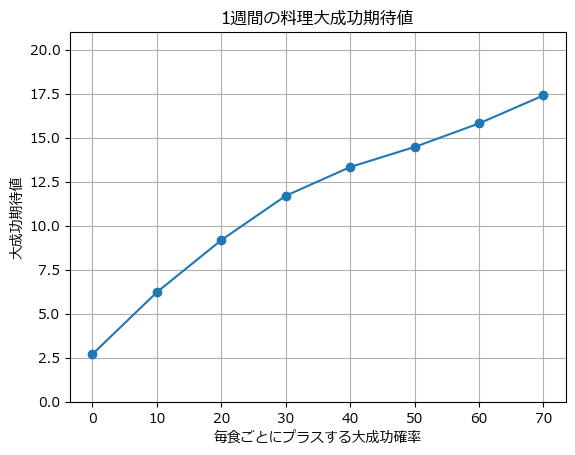

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Meiryo'

x = [i*10 for i in range(len(expectations))]
y = expectations

plt.plot(x, y, marker="o")
plt.xlabel("毎食ごとにプラスする大成功確率")
plt.ylabel("大成功期待値")
plt.ylim(bottom=0, top=21)
plt.title("1週間の料理大成功期待値")
plt.grid(True)
plt.show()